# IMDB 영화 리뷰 감성분석


In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving labeledTrainData.tsv to labeledTrainData.tsv


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(filename, sep='\t', quoting=3)
df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [8]:
df.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [4]:
df.review[0][:1000]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

## 1. 전처리

In [5]:
# <br /> 태그는 공백으로 전환
df['review'] = df.review.str.replace('<br />', ' ')

In [6]:
# 구둣점, 숫자 제거 --> 영어 이외의 문자느 공백으로 벼환
import re
df['review'] = df.review.apply(lambda x: re.sub('[^A-Za-z]', ' ',x))

In [7]:
df.review[0][:1000]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for 

## 2. 학습 및 테스트 데이터 셋으로 분리

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.review, df.sentiment, test_size=0.2,     # 20000개 - 훈련용, 5000개 - 테스트용
    stratify=df.sentiment, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000,), (5000,), (20000,), (5000,))

## 3. 텍스트 변환

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

- CountVectorizer, ngram_range(1,1)

In [12]:
cvect1 = CountVectorizer(stop_words='english')
X_train_cv1 = cvect1.fit_transform(X_train)
X_test_cv1 = cvect1.fit_transform(X_test)

In [13]:
X_train_cv1.shape, X_test_cv1.shape

((20000, 66971), (5000, 37187))

In [14]:
# train, test data set에 있는 동일한 단어에 대해서 동일한 값으로 변환하기 위해
# 반드시 아래와 같이 해야함!!!
cvect1 = CountVectorizer(stop_words='english')
cvect1.fit(X_train)
X_train_cv1 = cvect1.transform(X_train)
X_test_cv1 = cvect1.transform(X_test)
X_train_cv1.shape, X_test_cv1.shape

((20000, 66971), (5000, 66971))

- CounterVectorizer, ngram_range(1,2)

In [21]:
cvect2 = CountVectorizer(stop_words='english', ngram_range=(1,2))
cvect2.fit(X_train)
X_train_cv2 = cvect2.transform(X_train)
X_test_cv2 = cvect2.transform(X_test)
X_train_cv2.shape, X_test_cv2.shape

((20000, 1461350), (5000, 1461350))

- TfidfVectorizer, ngram_range=(1,1)

In [26]:
tvect1 = TfidfVectorizer(stop_words='english')
tvect1.fit(X_train)
X_train_tv1 = tvect1.transform(X_train)
X_test_tv1 = tvect1.transform(X_test)
X_train_tv1.shape, X_test_tv1.shape

((20000, 66971), (5000, 66971))

- TfidfVectorizer, ngram_range=(1,2)

In [35]:
tvect2 = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tvect2.fit(X_train)
X_train_tv2 = tvect2.transform(X_train)
X_test_tv2 = tvect2.transform(X_test)
X_train_tv2.shape, X_test_tv2.shape

((20000, 1461350), (5000, 1461350))

## 4. 로지스틱 회귀 모델로 학습(훈련)

In [15]:
from sklearn.linear_model import LogisticRegression

In [17]:
# 객체 생성 및 훈련 - 훈련 데이터의 X와 y 모두 필요
lr1 = LogisticRegression(max_iter=500)
%time lr1.fit(X_train_cv1, y_train)

CPU times: user 7.12 s, sys: 7.37 s, total: 14.5 s
Wall time: 7.46 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr2 = LogisticRegression(max_iter=500)
%time lr2.fit(X_train_cv2, y_train)

CPU times: user 1min, sys: 39.8 s, total: 1min 40s
Wall time: 53.1 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr3 = LogisticRegression(max_iter=500)
%time lr3.fit(X_train_tv1, y_train)

CPU times: user 2.06 s, sys: 2.2 s, total: 4.26 s
Wall time: 2.22 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
lr4 = LogisticRegression(max_iter=500)
%time lr4.fit(X_train_tv2, y_train)

CPU times: user 17.6 s, sys: 11.6 s, total: 29.2 s
Wall time: 15.8 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# 테스트 데이터에 대해 예측 - 테스트 데이터의 X만 필요
pred1 = lr1.predict(X_test_cv1)

In [37]:
pred2 = lr2.predict(X_test_cv2)
pred3 = lr3.predict(X_test_tv1)
pred4 = lr4.predict(X_test_tv2)

## 5. 평가

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
score1 = accuracy_score(y_test, pred1)
score1

0.8832

In [24]:
score2 = accuracy_score(y_test, pred2)
score2

0.8914

In [38]:
score2 = accuracy_score(y_test, pred2)
score3 = accuracy_score(y_test, pred3)
score4 = accuracy_score(y_test, pred4)
score2, score3, score4

(0.8914, 0.893, 0.883)

## 6. 비지도 학습 기반 감성분석
- 감성어휘 사전

In [39]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sanalyzer = SentimentIntensityAnalyzer()

In [41]:
senti_score = sanalyzer.polarity_scores(df.review[0])
senti_score

{'compound': -0.7943, 'neg': 0.13, 'neu': 0.743, 'pos': 0.127}

In [42]:
df.sentiment[0]

1

In [43]:
# compound score 값이 0.1보다 크면 긍정(1), 낮으면 부정(0)
def get_sentiment(sanalyzer, review, threshold):
    score = sanalyzer.polarity_scores(review)
    compound_score = score['compound']
    final_score = 1 if compound_score > threshold else 0
    return final_score

In [44]:
df['vader_pred'] = df.review.apply(lambda x: get_sentiment(sanalyzer, x, 0.1))

In [45]:
df.vader_pred.mean()

0.65588

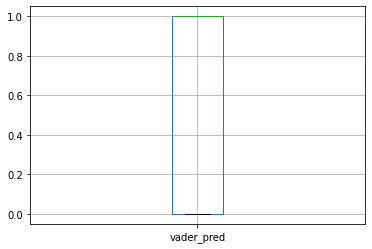

In [46]:
df[['vader_pred']].boxplot()

In [48]:
# 평가, real y - df.sentiment, 예측 y - df.vader_pred
accuracy_score(df.sentiment, df.vader_pred)

0.69476

In [49]:
for threshold in [0, 0.1, 0.2, 0.3]:
    df['vader_pred'] = df.review.apply(lambda x: get_sentiment(sanalyzer, x, threshold))
    score = accuracy_score(df.sentiment, df.vader_pred)
    print(f'threshold값 {threshold} : {score}')

threshold값 0 : 0.6906
threshold값 0.1 : 0.69476
threshold값 0.2 : 0.69872
threshold값 0.3 : 0.7022
